# **Task 1**

## **Import library**

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
nltk.download('stopwords')
nltk.download('punkt')
%pip install kagglehub

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'below', "he's", 'while', 'because', 'ma', "it'd", 'against', 'having', 'her', 'then', "needn't", "mightn't", 'most', 'few', 'the', 'through', 're', 'this', 'down', 'hadn', 't', 'those', 'will', "i'd", 'weren', 'aren', 'now', 'it', 'd', 'was', "won't", 'mustn', 'should', 'couldn', 'for', "i'll", 'into', 'ours', 'll', 'by', 'once', "it'll", "he'll", 'be', 'my', 'so', "we're", "she's", 'all', "aren't", 'been', 'with', 'again', 'ain', 'over', 'have', "we'll", 'is', 'only', 'some', "you've", 'itself', 'than', 'where', 'which', 'm', "doesn't", 'its', 'about', 'any', 'nor', 'each', "mustn't", "you'd", 'does', 'his', 'to', "couldn't", 'an', 'needn', 'o', "shan't", 'before', "they'll", 'too', 'if', 'these', 'under', 'up', 'ourselves', 'mightn', 'shouldn', 'didn', "you'll", 'themselves', 'very', 'what', 'more', 'me', 'him', 'between', 'in', 'out', 'above', "shouldn't", 've', 'theirs', 'being', 'haven', 'hers', 'am', "don't", 'yourself', 'here', 'such', "wasn't", 'himself', 'after', 'a', "he'd"

## **Load the data and Exploration**



In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [5]:
# Load CSV file
df = pd.read_csv(f"{path}/IMDB Dataset.csv")

In [6]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
# take a random sample of 10000 records
df_sample = df.sample(n=25000, random_state=42)

In [10]:
# see the data
df_sample.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [11]:
# the count of the record in the 10000 row and show the count of the bositive and negative sentiment
df_sample['sentiment'].value_counts()

,count
sentiment,
positive,12517
negative,12483


In [12]:
# Show first 3 reviews
for i in range(3):
    print(f"Review {i+1}:\n", df_sample['review'].iloc[i], "\nSentiment:", df_sample['sentiment'].iloc[i], "\n")

Review 1:
 I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna d

## **Preprocess the data**


In [13]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [14]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

display(df.head())

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## **Split the data**


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

print("Data splitting complete.")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Data splitting complete.
Training data shape: (40000,)
Testing data shape: (10000,)


## **Convert the text data into numerical features using TF-IDF.**

In [16]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text vectorization complete.")
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)

Text vectorization complete.
Training data shape: (40000, 10000)
Testing data shape: (10000, 10000)


## **Train a model**


In [17]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

print("Model training complete.")

Model training complete.


## **Evaluate the model**


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_mat)

Model Evaluation:
Accuracy: 0.8937
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4359  602]
 [ 461 4578]]


# **Bouns Task 1**

## **Visualize frequent words**



In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate positive and negative reviews
positive_reviews_df = df[df['sentiment'] == 'positive']
negative_reviews_df = df[df['sentiment'] == 'negative']

# Concatenate cleaned reviews
positive_text = " ".join(positive_reviews_df['cleaned_review'])
negative_text = " ".join(negative_reviews_df['cleaned_review'])

# Use CountVectorizer to get word counts
count_vectorizer = CountVectorizer(max_features=45)


In [20]:
# Positive word counts
positive_word_counts = count_vectorizer.fit_transform([positive_text])
positive_words = count_vectorizer.get_feature_names_out()
positive_counts = positive_word_counts.sum(axis=0).tolist()[0]
positive_word_freq = dict(zip(positive_words, positive_counts))
positive_word_freq = sorted(positive_word_freq.items(), key=lambda item: item[1], reverse=True)

# Negative word counts
negative_word_counts = count_vectorizer.fit_transform([negative_text])
negative_words = count_vectorizer.get_feature_names_out()
negative_counts = negative_word_counts.sum(axis=0).tolist()[0]
negative_word_freq = dict(zip(negative_words, negative_counts))
negative_word_freq = sorted(negative_word_freq.items(), key=lambda item: item[1], reverse=True)

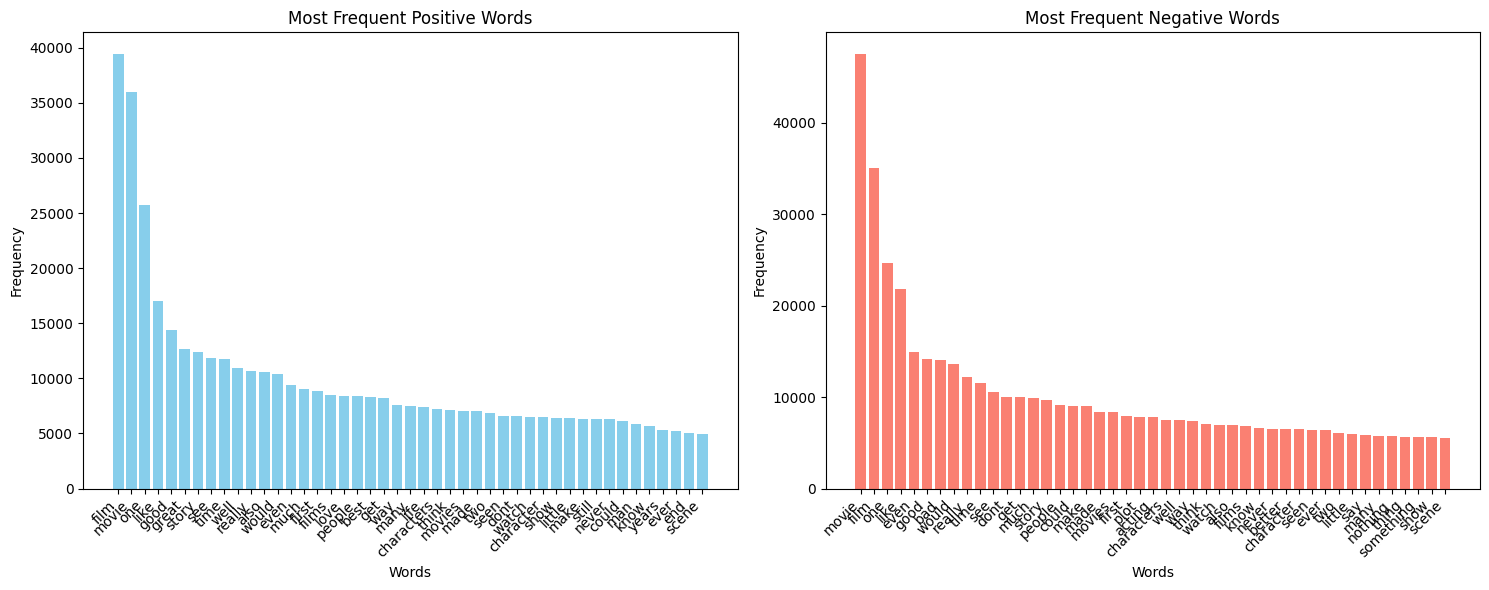

In [21]:
# Create bar plots
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(*zip(*positive_word_freq), color='skyblue')
plt.title('Most Frequent Positive Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(*zip(*negative_word_freq), color='salmon')
plt.title('Most Frequent Negative Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **Train a naive bayes classifier**



In [22]:
# Initialize and train the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
print("Naive Bayes model training complete.")

Naive Bayes model training complete.


In [23]:
# Predict with both models
y_pred_lr = model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [24]:
# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix:")
print(confusion_mat_lr)

Logistic Regression Evaluation:
Accuracy: 0.8937
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[4359  602]
 [ 461 4578]]


In [25]:
# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)
confusion_mat_nb = confusion_matrix(y_test, y_pred_nb)

print("\nNaive Bayes Evaluation:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:")
print(report_nb)
print("Confusion Matrix:")
print(confusion_mat_nb)



Naive Bayes Evaluation:
Accuracy: 0.858
Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4961
    positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
[[4249  712]
 [ 708 4331]]


In [26]:
# Compare model performance
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

if accuracy_lr > accuracy_nb:
    print("Logistic Regression performed better.")
elif accuracy_nb > accuracy_lr:
    print("Naive Bayes performed better.")
else:
    print("Both models performed equally.")


Model Comparison:
Logistic Regression Accuracy: 0.8937
Naive Bayes Accuracy: 0.8580
Logistic Regression performed better.
